## Step 1: Create Flower Project

In [ ]:
!flwr new quickstart-pytorch \
    --framework PyTorch \
    --username syft_flwr

### Step 1.1: Run Simulation

In [ ]:
!flwr run quickstart-pytorch/

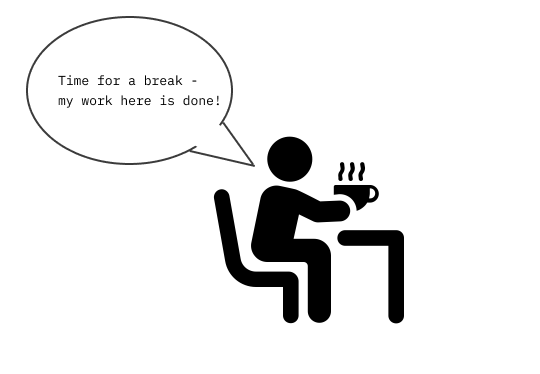

### Step 1.2 Customize Data Loaders

We modify the quickstart-pytorch example
- To load data from SyftBox
- To save model weights after training

using template.py

### Step 1.3 Re-Run Simulation

In [ ]:
!flwr run quickstart-pytorch

## Step 2: Setup RDS Server

In [ ]:
from syft_rds.orchestra import setup_rds_server

In [ ]:
ds_stack = setup_rds_server(email="ds@openmined.org", key="flwr")

In [ ]:
DO1 = "do1@openmined.org"
DO2 = "do2@openmined.org"
DS = "ds@openmined.org"

In [ ]:
do_client_1 = ds_stack.init_session(host=DO1)
print("Logged into: ", do_client_1.host)

do_client_2 = ds_stack.init_session(host=DO2)
print("Logged into: ", do_client_2.host)

In [ ]:
do_client_1.is_admin

In [ ]:
do_client_2.is_admin

## Step 3: Explore Datasets

In [ ]:
import os
from pathlib import Path

FLWR_PROJECT = "quickstart-pytorch"
SYFTBOX_DATASET_NAME = "cifar10"


FLWR_PROJECT_PATH = Path(f"{FLWR_PROJECT}")

In [ ]:
dataset1 = do_client_1.dataset.get(name=SYFTBOX_DATASET_NAME)
dataset1.describe()

In [ ]:
dataset2 = do_client_2.dataset.get(name=SYFTBOX_DATASET_NAME)
dataset2.describe()

## Step 4: Bootstrap Project

In [ ]:
FLWR_PROJECT_PATH

In [ ]:
import syft_flwr

try:
    syft_flwr.bootstrap(FLWR_PROJECT_PATH, aggregator=DS, datasites=[DO1, DO2])
    print("Bootstrapped project successfully ✅")
except Exception as e:
    print(e)

## Step 5: DS Submits Jobs

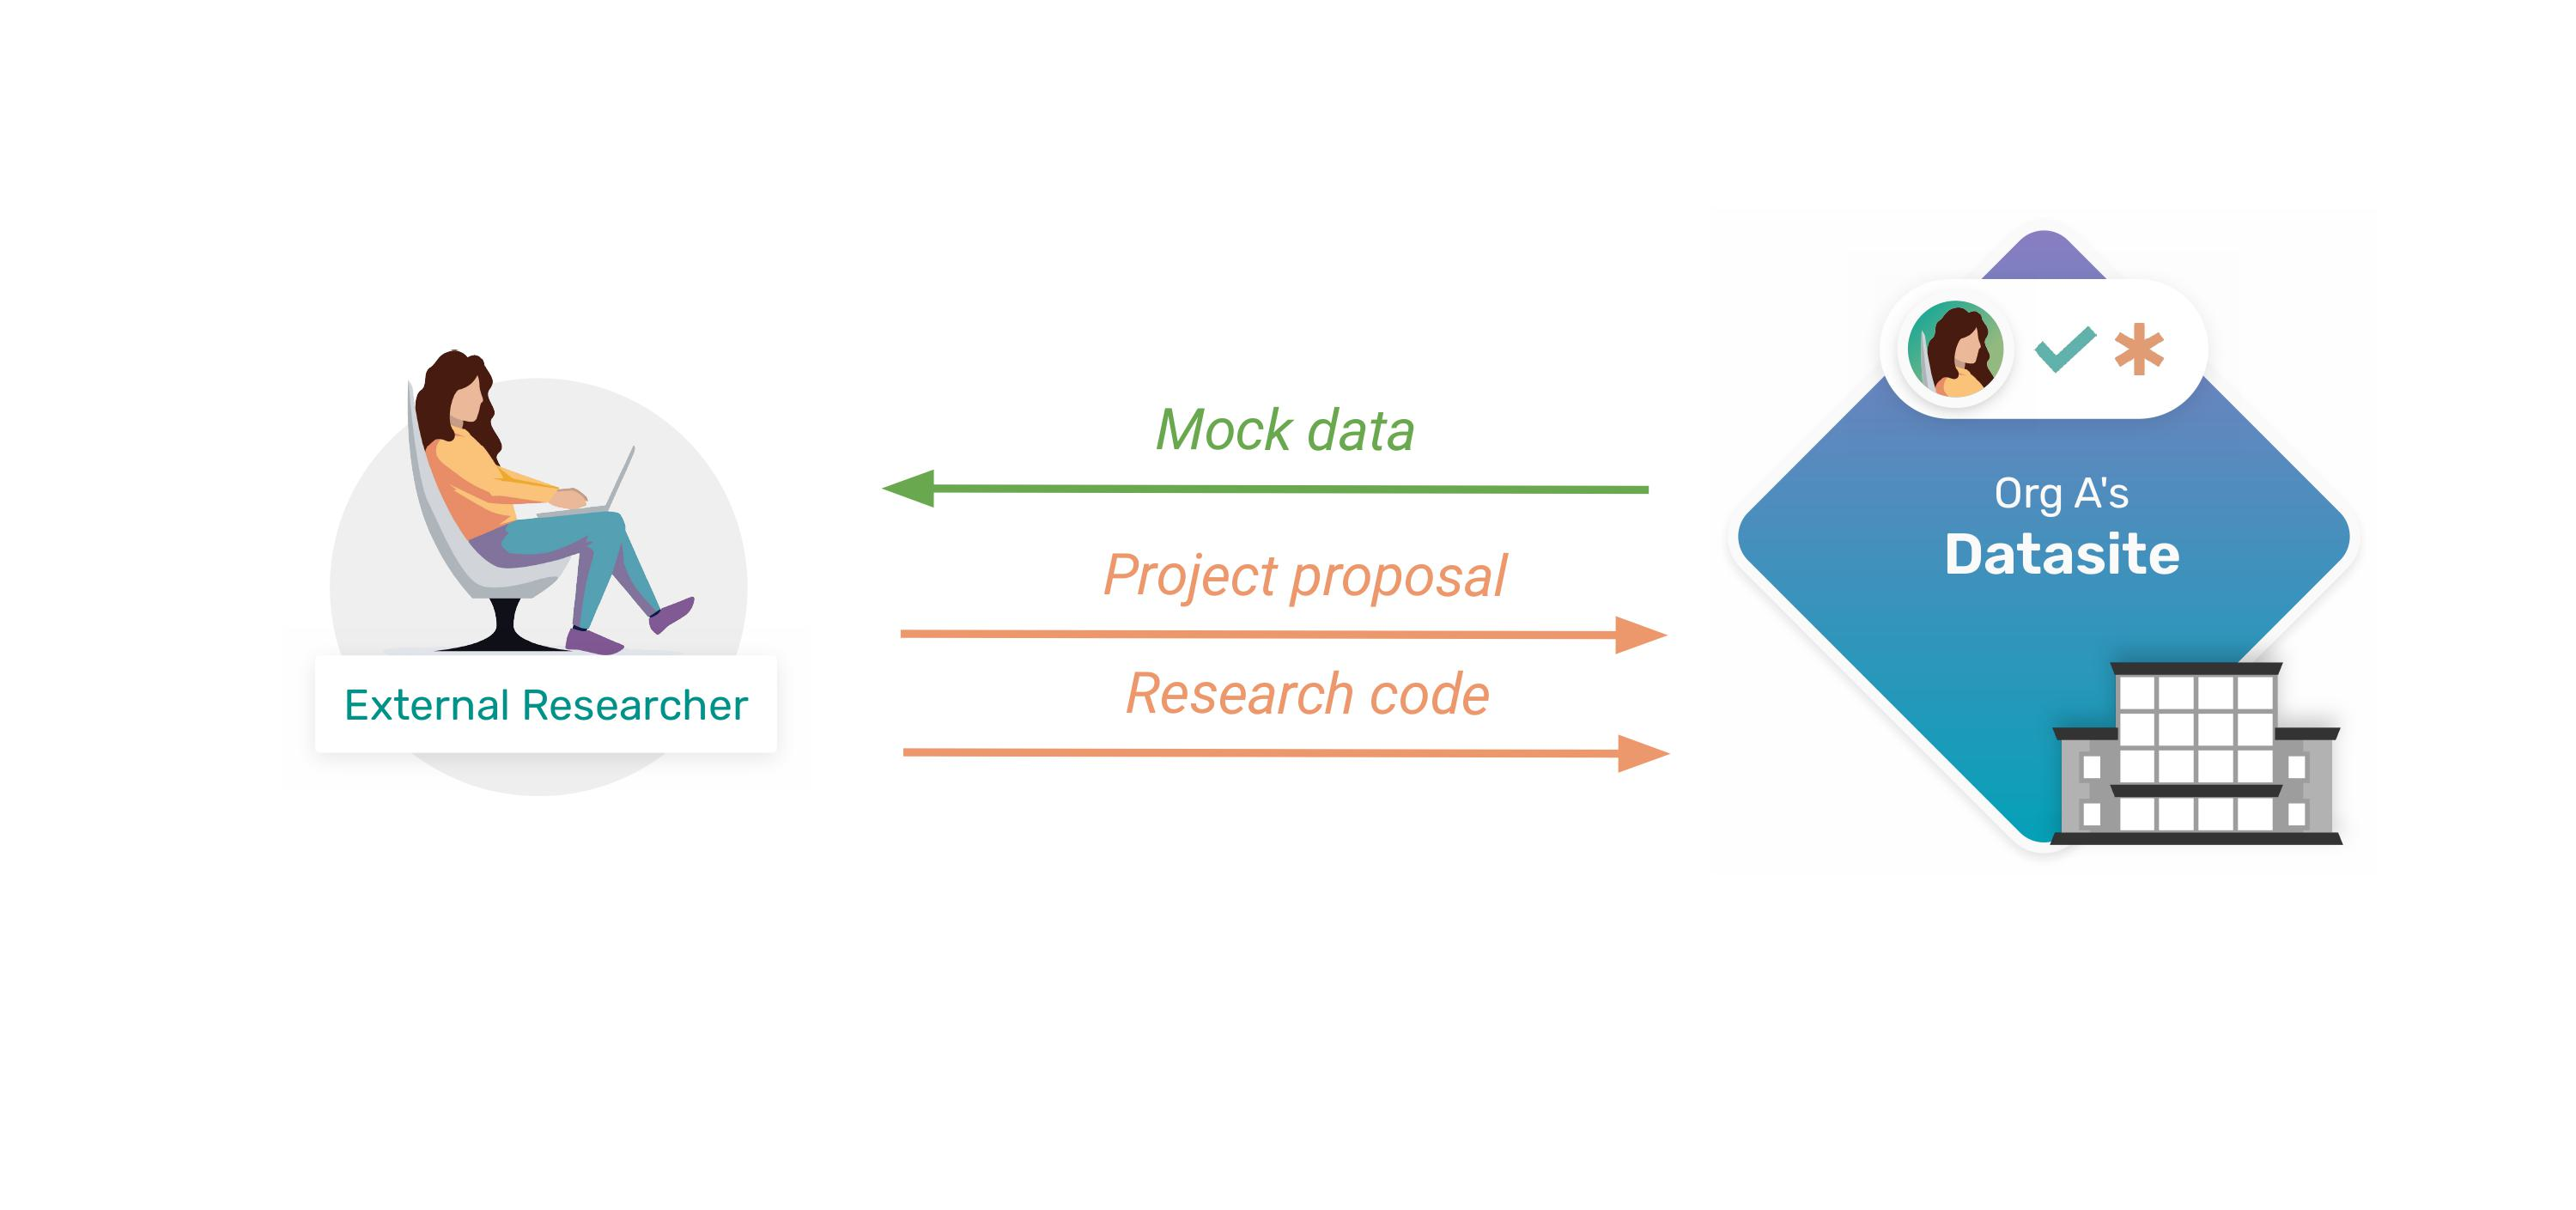

In [ ]:
# Job submission
datasites = [do_client_1, do_client_2]

for client in datasites:
    job = client.jobs.submit(
        name="Syft Flower Pytorch Experiment",
        description="Syft Flower Federated Learning Experiment",
        user_code_path=FLWR_PROJECT_PATH,
        dataset_name=SYFTBOX_DATASET_NAME,
        tags=["federated", "learning", "syft", "flwr"],
        entrypoint="main.py",
    )
    print(job)

Now DOs can review the jobs

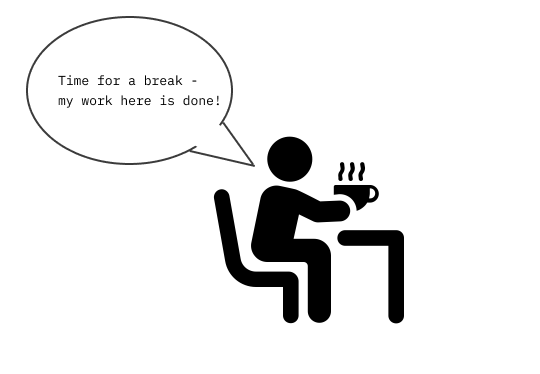

## Step 6: DS starts Aggregator

In [ ]:
os.environ["SYFTBOX_CLIENT_CONFIG_PATH"] = str(ds_stack.client.config_path)
!uv run {str(FLWR_PROJECT_PATH / "main.py")} --active